data from https://www.kaggle.com/mattiuzc/commodity-futures-price-history


# 데이터 가져오기

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!cp /gdrive/MyDrive/tmp/bitcoin.csv ./

# 데이터 로딩

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("bitcoin.csv")
df.head()

Timestamp  Open  High  ...  Volume_(BTC)  Volume_(Currency)  Weighted_Price
0  1325317920  4.39  4.39  ...      0.455581                2.0            4.39
1  1325317980   NaN   NaN  ...           NaN                NaN             NaN
2  1325318040   NaN   NaN  ...           NaN                NaN             NaN
3  1325318100   NaN   NaN  ...           NaN                NaN             NaN
4  1325318160   NaN   NaN  ...           NaN                NaN             NaN

[5 rows x 8 columns]

In [ ]:
df.tail()

Timestamp      Open  ...  Volume_(Currency)  Weighted_Price
4857372  1617148560  58714.31  ...       81259.372187    58692.753339
4857373  1617148620  58683.97  ...      428158.146640    58693.226508
4857374  1617148680  58693.43  ...      100117.070370    58696.198496
4857375  1617148740  58742.18  ...       42332.958633    58761.866202
4857376  1617148800  58767.75  ...      159417.751000    58764.349363

[5 rows x 8 columns]

In [ ]:
print(len(df))

4857377


# 결측치 분포 파악

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [ ]:
df.isnull().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [ ]:
print(df.Timestamp.min(), df.Timestamp.max())
diff = df.Timestamp.max() - df.Timestamp.min()
print(diff)
count_with_60_interval = diff / 60

# timestamp 최소와 최대 값 사이를 60으로 나눈 갯수와 전체 데이터 갯수가 다르다.
# 중간에 timestamp가 빈곳이 있다.
print(count_with_60_interval)
print(len(df))


1325317920 1617148800
291830880
4863848.0
4857377


In [ ]:
last_quantile = 0
null_counts = []
for q in np.arange(0, 1.0, 0.01):
    current_quantile = df.Timestamp.quantile(q)
    null_count = df[(df.Timestamp>=last_quantile) & (df.Timestamp<current_quantile)].Open.isnull().sum()
    null_counts.append(null_count)
    last_quantile = current_quantile



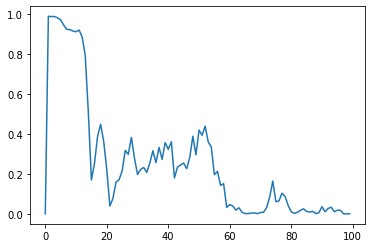

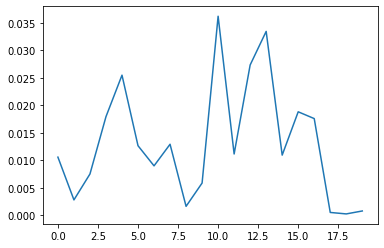

In [ ]:
null_counts = np.array(null_counts)
plt.plot(null_counts/len(df)*100.)
plt.show()

plt.plot(null_counts[80:]/len(df)*100.)
plt.show()

전체 데이터 중 80% 이후의 데이터는 최대 0.035%만 null이다. 

이 데이터 만을 가지고 하자. 그리고 결측치는 앞의 값으로 채우자.

# 대상 데이터 추림

In [ ]:
index_of_80_percent = int( len(df) * 0.8 )
df = df[df.index>index_of_80_percent]
print(len(df))

971475


In [ ]:
last_quantile = 0
null_counts = []
for q in np.arange(0, 1.0, 0.01):
    current_quantile = df.Timestamp.quantile(q)
    null_count = df[(df.Timestamp>=last_quantile) & (df.Timestamp<current_quantile)].Open.isnull().sum()
    null_counts.append(null_count)
    last_quantile = current_quantile

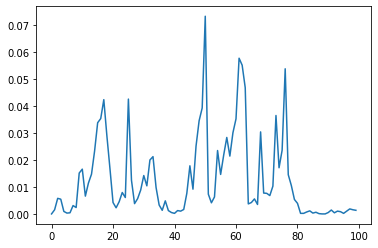

In [ ]:
null_counts = np.array(null_counts)
plt.plot(null_counts/len(df)*100.)
plt.show()

1개 구간이 1만 개 이다. 최대가 0.07이면 만개 중에 7개.
연속되어 있더라도 무시해도 되겠다.

0


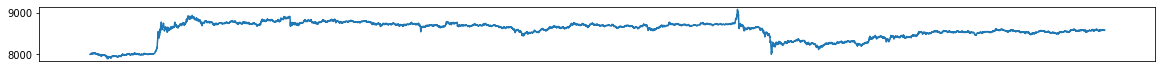

1


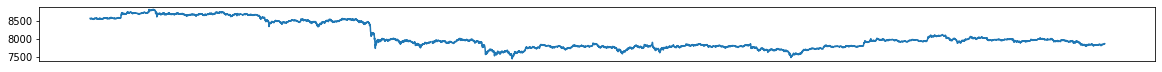

2


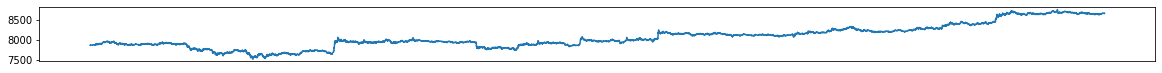

3


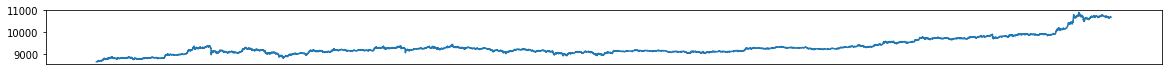

4


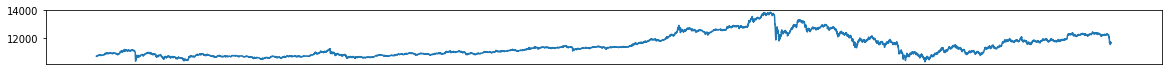

5


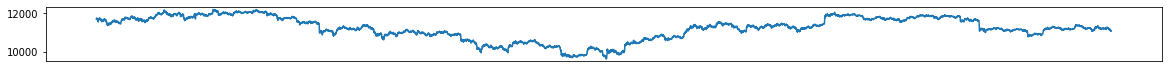

6


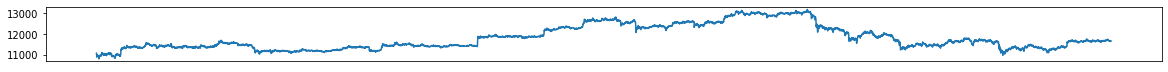

7


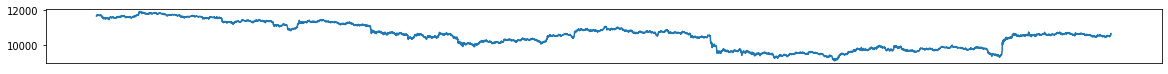

8


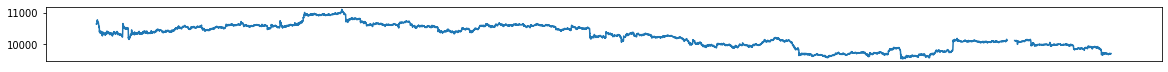

9


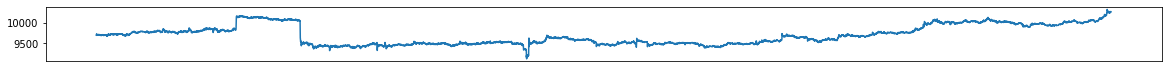

10


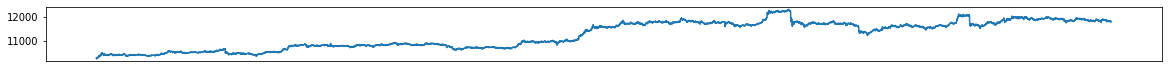

11


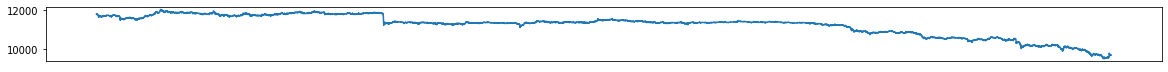

12


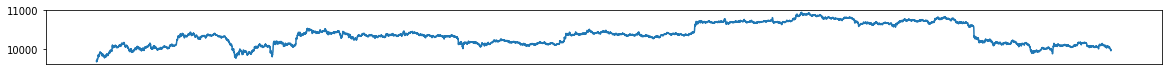

13


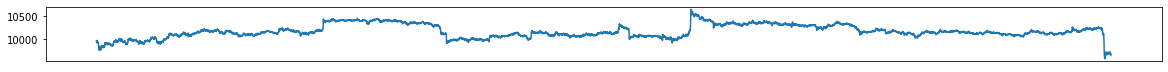

14


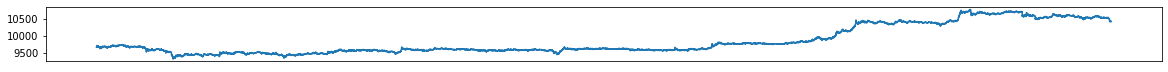

15


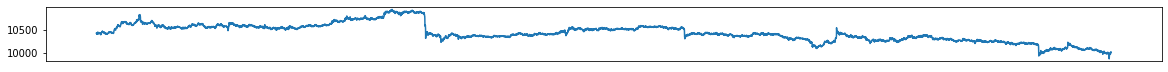

16


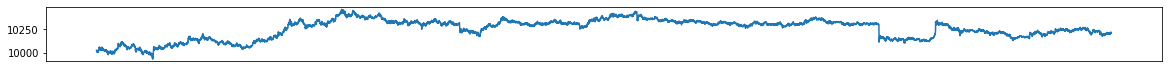

17


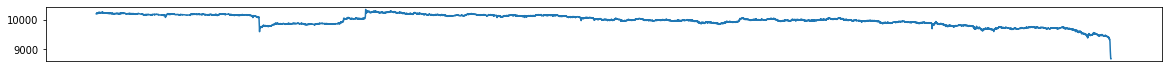

18


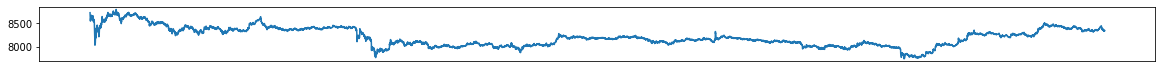

19


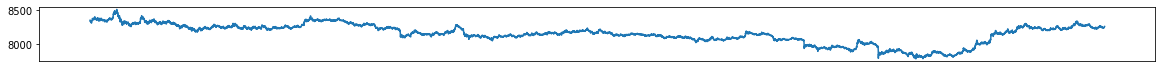

20


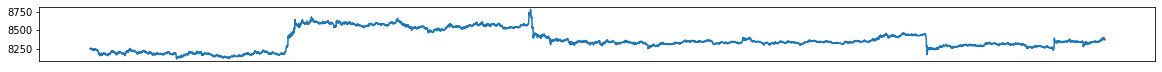

21


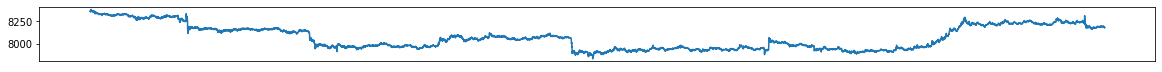

22


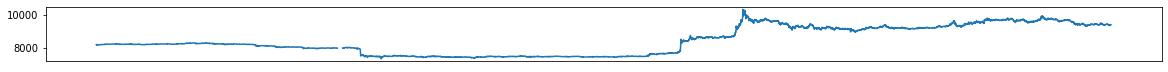

23


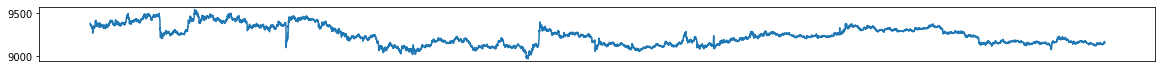

24


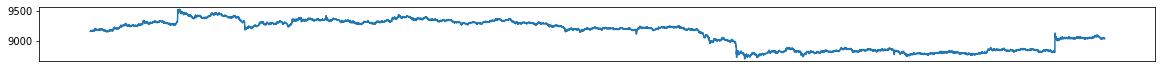

25


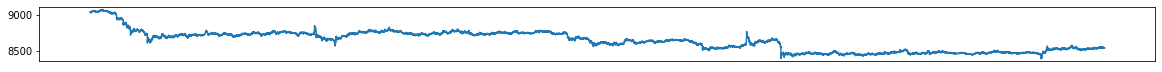

26


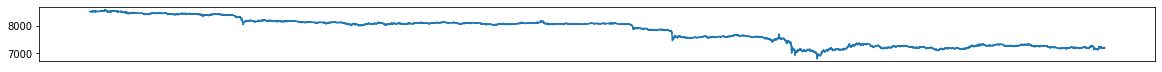

27


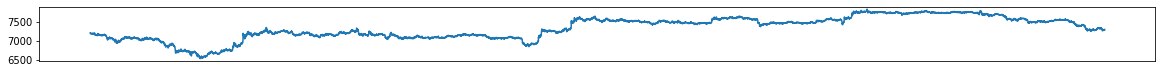

28


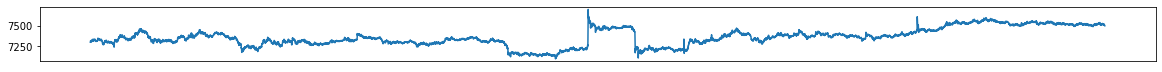

29


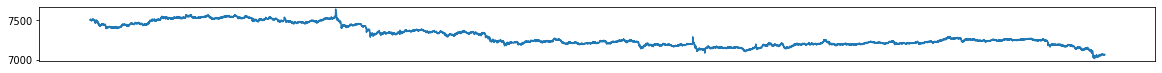

30


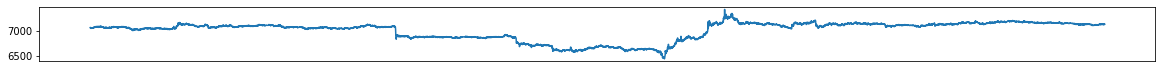

31


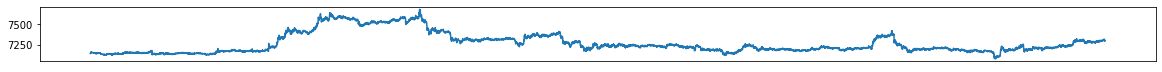

32


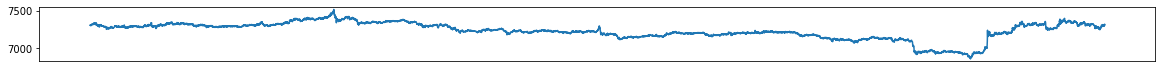

33


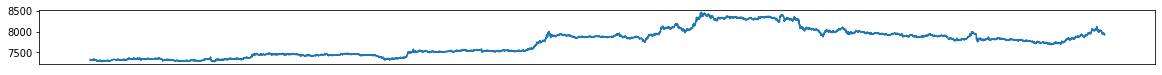

34


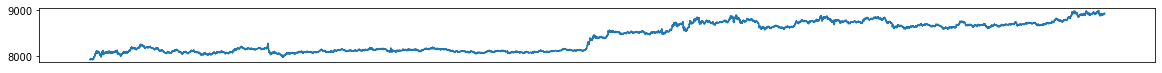

35


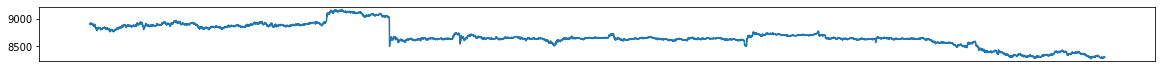

36


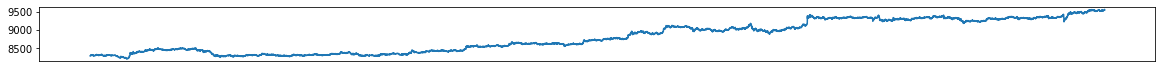

37


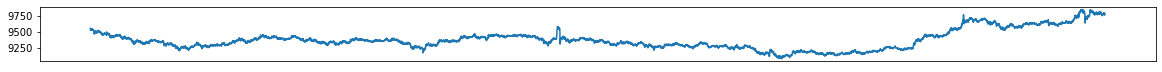

38


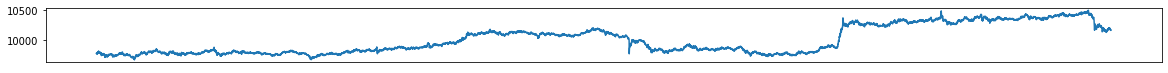

39


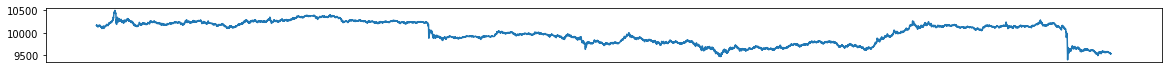

40


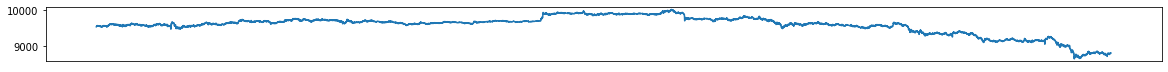

41


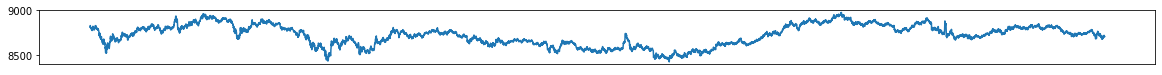

42


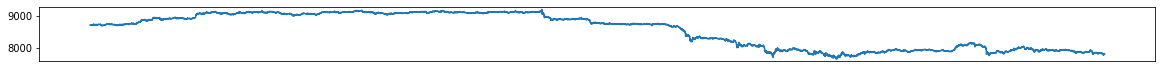

43


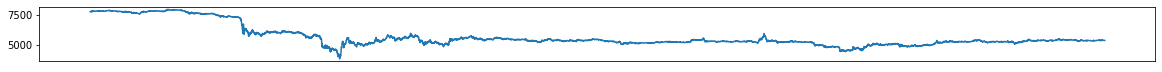

44


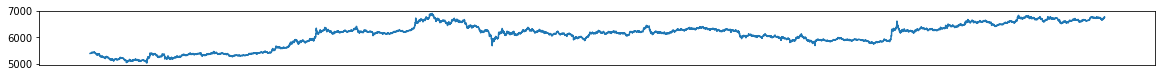

45


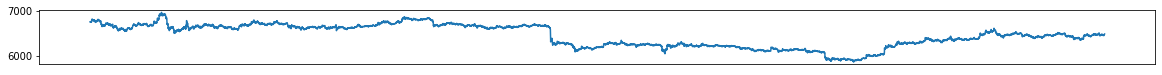

46


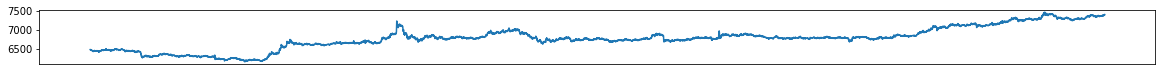

47


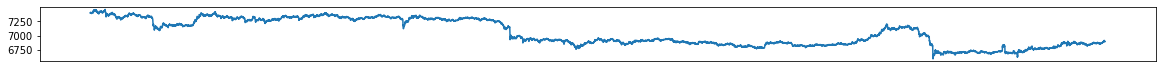

48


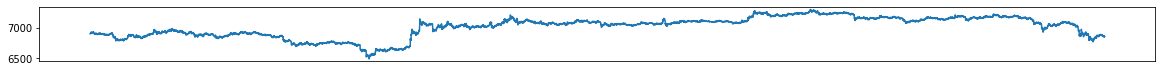

49


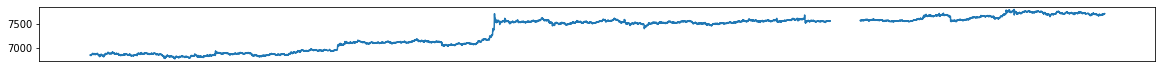

50


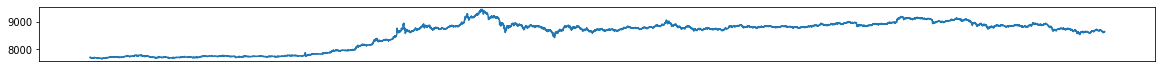

51


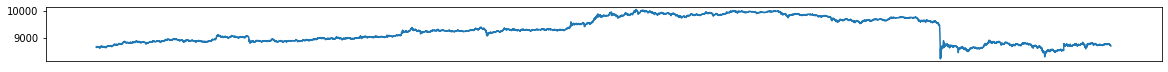

52


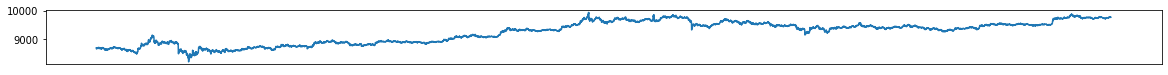

53


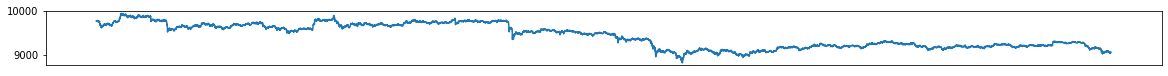

54


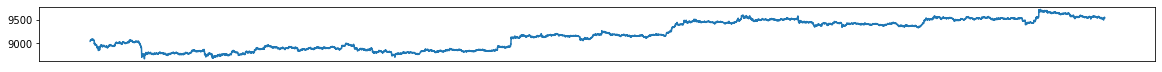

55


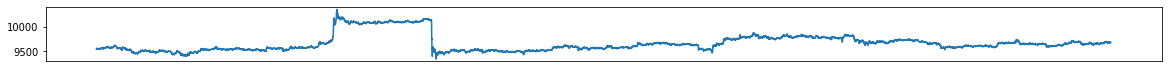

56


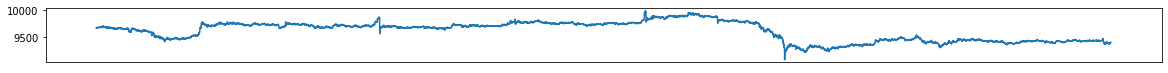

57


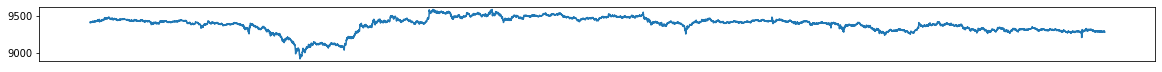

58


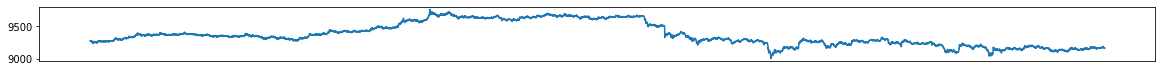

59


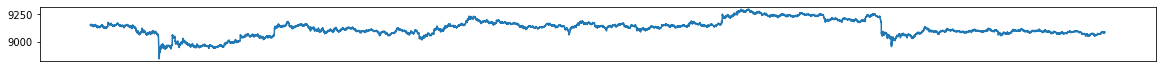

60


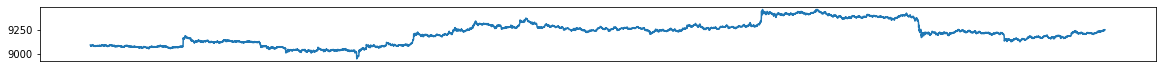

61


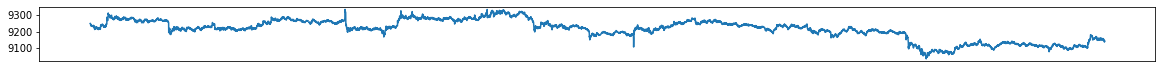

62


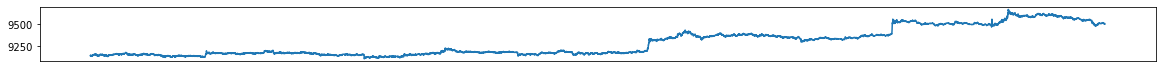

63


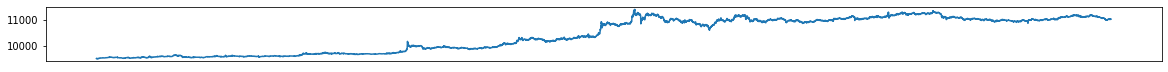

64


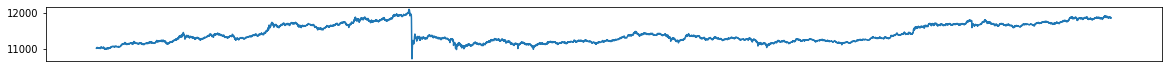

65


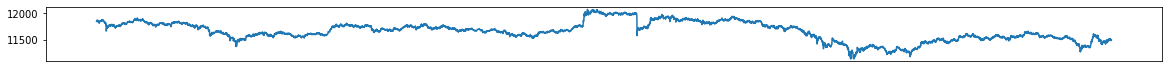

66


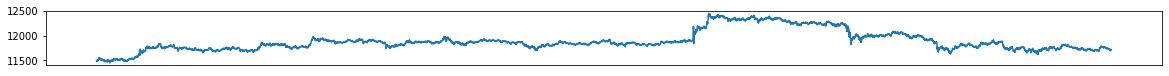

67


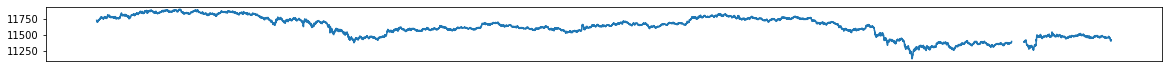

68


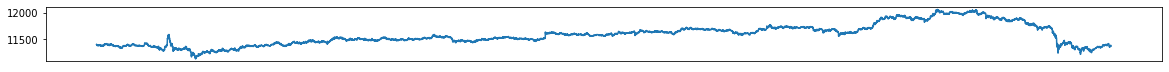

69


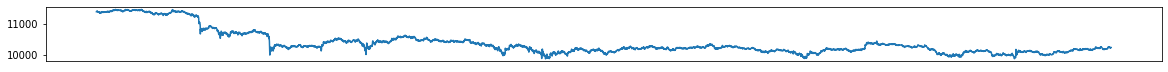

70


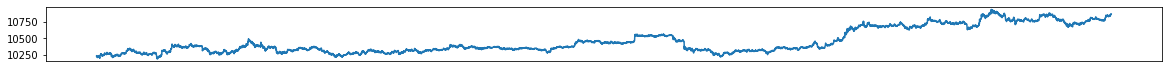

71


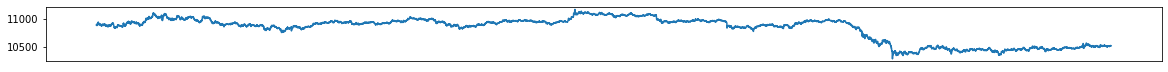

72


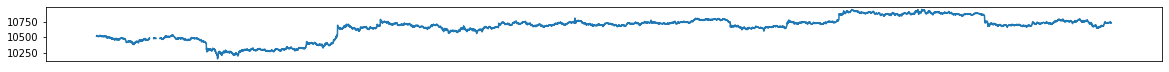

73


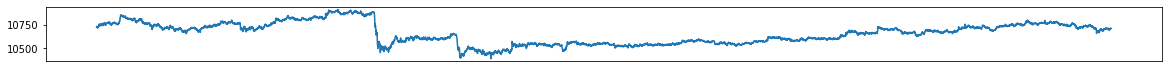

74


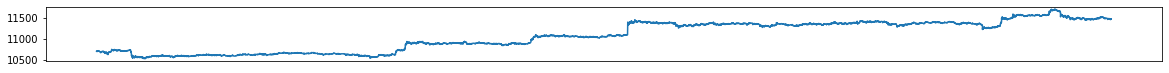

75


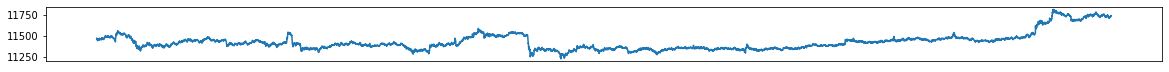

76


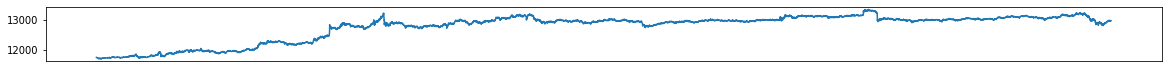

77


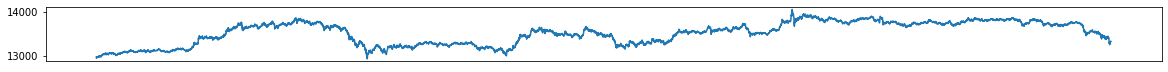

78


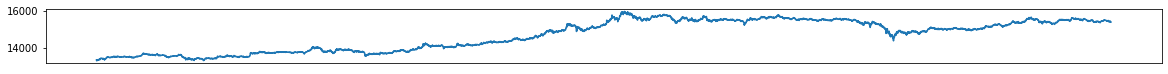

79


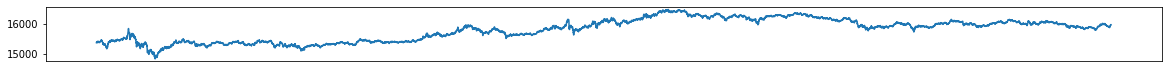

80


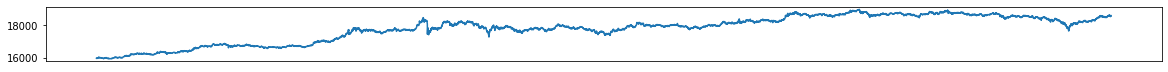

81


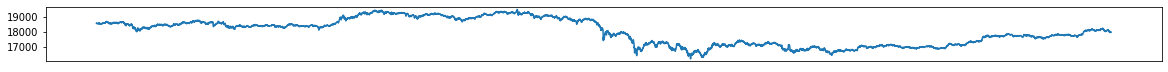

82


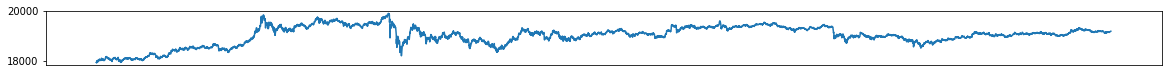

83


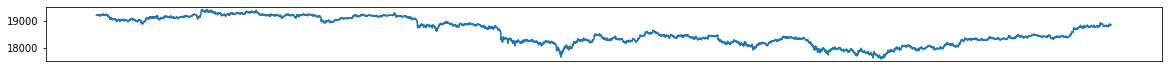

84


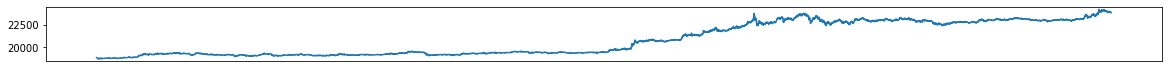

85


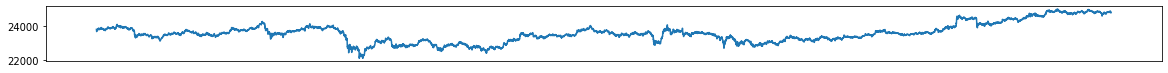

86


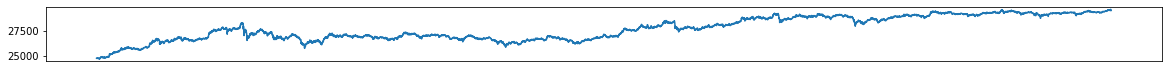

87


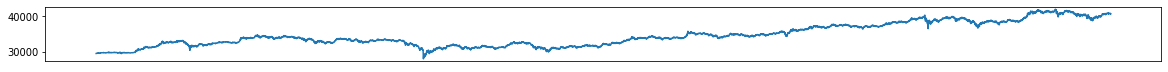

88


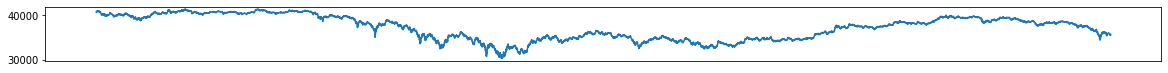

89


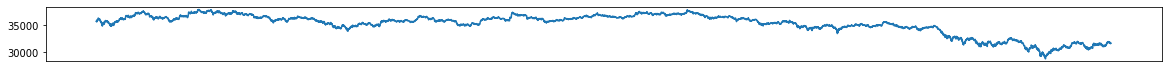

90


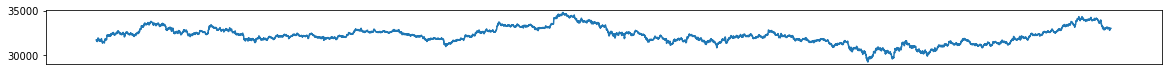

91


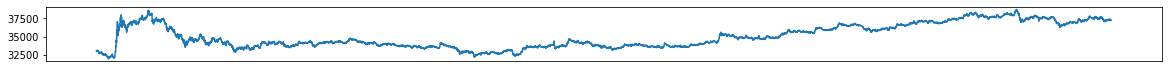

92


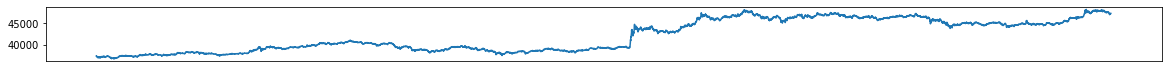

93


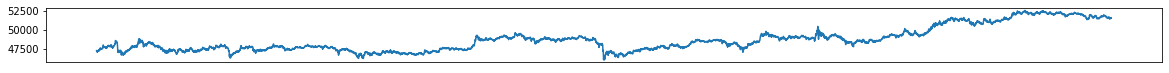

94


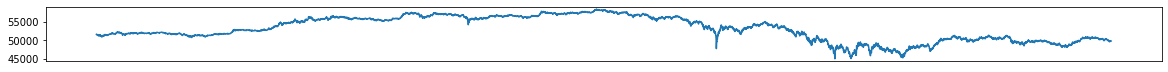

95


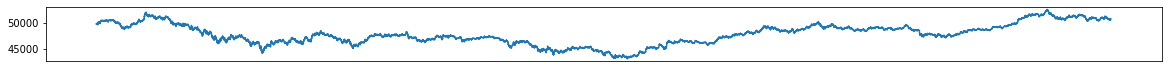

96


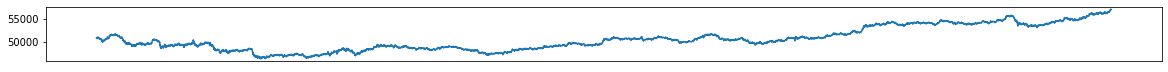

97


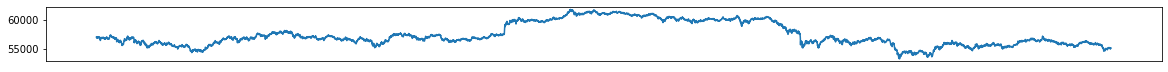

98


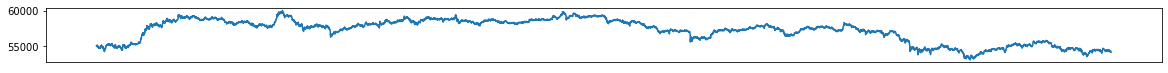

99


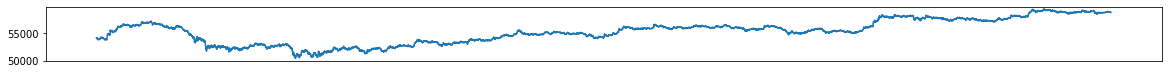

In [ ]:
interval = int(len(df)/100)
for i in range(100):
    print(i)
    plt.figure(figsize=(20,1))
    plt.plot(df.Open[i*interval:(i+1)*interval])
    plt.xticks([])
    plt.show()

# 결측치 처리

In [ ]:
print(df.isnull().sum())

Timestamp                0
Open                 12383
High                 12383
Low                  12383
Close                12383
Volume_(BTC)         12383
Volume_(Currency)    12383
Weighted_Price       12383
dtype: int64


In [ ]:
df.fillna(method="ffill", inplace=True)

In [ ]:
print(df.isnull().sum().sum())

0


# 불필요 컬럼 삭제

In [ ]:
df.head()

Timestamp     Open  ...  Volume_(Currency)  Weighted_Price
3885902  1558860360  8000.37  ...       10147.051640     8003.175605
3885903  1558860420  8003.56  ...         302.979753     8004.207711
3885904  1558860480  8005.46  ...      113824.502040     8006.524723
3885905  1558860540  8006.68  ...        4741.154568     8010.379478
3885906  1558860600  8008.77  ...       14864.621864     8014.019345

[5 rows x 8 columns]

In [ ]:
df.drop(columns=["Timestamp"], inplace=True)

In [ ]:
df.head()

Open     High  ...  Volume_(Currency)  Weighted_Price
3885902  8000.37  8003.18  ...       10147.051640     8003.175605
3885903  8003.56  8005.46  ...         302.979753     8004.207711
3885904  8005.46  8015.30  ...      113824.502040     8006.524723
3885905  8006.68  8012.76  ...        4741.154568     8010.379478
3885906  8008.77  8020.15  ...       14864.621864     8014.019345

[5 rows x 7 columns]

# 각 컬럼 분포 보기

Open


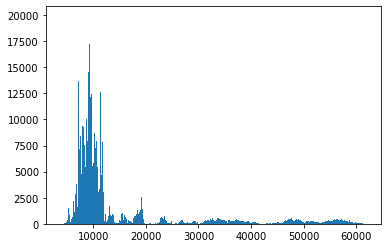

High


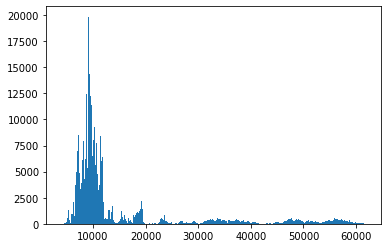

Low


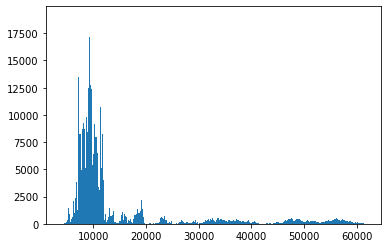

Close


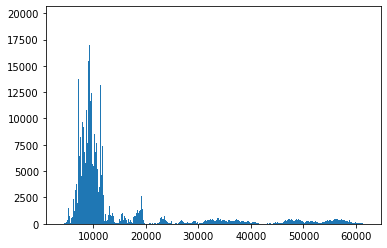

Volume_(BTC)


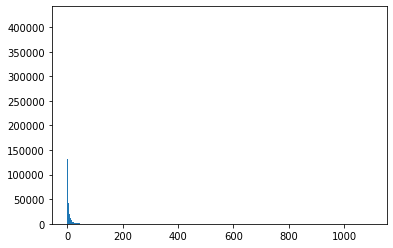

Volume_(Currency)


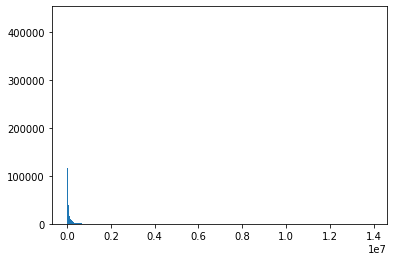

Weighted_Price


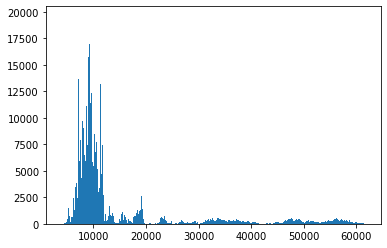

In [ ]:
for i in range(len(df.columns)):
    print(df.columns[i])
    plt.hist(df.iloc[:,i], bins=1000)
    plt.show()

# 모든 컬럼 로그 처리

In [ ]:
df = np.log(df+1)

Open


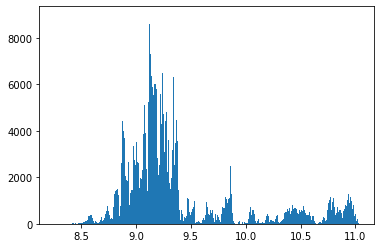

High


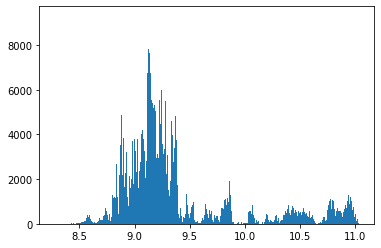

Low


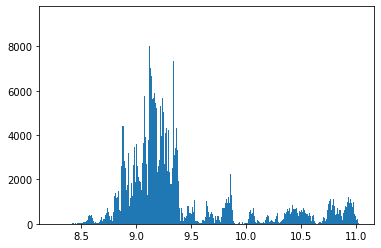

Close


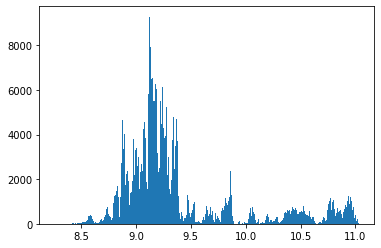

Volume_(BTC)


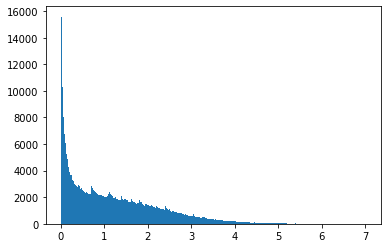

Volume_(Currency)


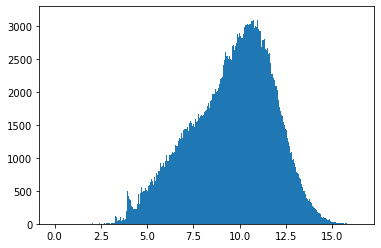

Weighted_Price


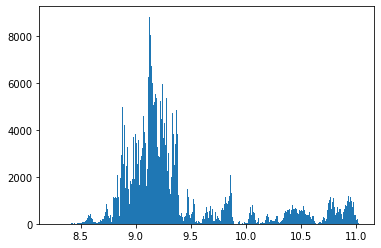

In [ ]:
for i in range(len(df.columns)):
    print(df.columns[i])
    plt.hist(df.iloc[:,i], bins=1000)
    plt.show()

# numpy 변환

In [ ]:
raw_data = df.to_numpy()
print(raw_data.shape)

(971475, 7)


In [ ]:
print(raw_data[:5])

[[ 8.98736806  8.98771918  8.98736806  8.98765547  0.81884467  9.22503701
   8.98771864]
 [ 8.98776666  8.98800399  8.98776666  8.98776666  0.03715373  5.7169611
   8.98784757]
 [ 8.98800399  8.98923225  8.98776791  8.98779164  2.72237826 11.64242187
   8.98813697]
 [ 8.98815636  8.98891534  8.98815636  8.98876684  0.46491345  8.46424686
   8.98861824]
 [ 8.98841733  8.98983708  8.98841733  8.98888415  1.04901135  9.60680657
   8.98907248]]


# normalize

In [ ]:
maxs = raw_data.max(axis=0)
print(maxs)
mins = raw_data.min(axis=0)
print(mins)

[11.03108502 11.03138077 11.02962665 11.03138029  7.00247381 16.44744784
 11.03031803]
[8.25823333e+00 8.27589840e+00 8.25608813e+00 8.25997566e+00
 1.69999986e-07 9.12925157e-04 8.26281188e+00]


In [ ]:
normalized = (raw_data - mins) / (maxs - mins)
print(normalized[:5])

[[0.26295482 0.25832892 0.26366316 0.26256715 0.11693646 0.56085517
  0.26193501]
 [0.26309858 0.25843228 0.26380687 0.26260727 0.00530578 0.34755334
  0.2619816 ]
 [0.26318417 0.25887803 0.26380732 0.26261628 0.38877377 0.70783962
  0.26208617]
 [0.26323912 0.25876302 0.26394738 0.26296816 0.06639272 0.51459678
  0.26226007]
 [0.26333323 0.25909753 0.26404147 0.26301049 0.1498058  0.58406793
  0.26242421]]


In [ ]:
preprocessed = normalized

# 파라매터 설정

In [ ]:
SEQUENCE_LENGTH = 16 * 60
OFFSET = 1
BATCH_SIZE = 32
SAMPLING_COUNT = 10000

# by Data Sampling

## 샘플링

In [ ]:
numbers = preprocessed

In [ ]:
raw_x = []
raw_y = []

for j in range(SAMPLING_COUNT):
  i = np.random.randint(len(numbers)-SEQUENCE_LENGTH-OFFSET)
  if i+SEQUENCE_LENGTH+OFFSET >= len(numbers): break
  raw_x.append(numbers[i:i+SEQUENCE_LENGTH,:])
#   raw_y.append(numbers[i+SEQUENCE_LENGTH+OFFSET-1,:])
  current_price = numbers[i+SEQUENCE_LENGTH-1,:][3]
  future_price = numbers[i+SEQUENCE_LENGTH+OFFSET-1,:][3]
  raw_y.append(int(future_price > current_price))


In [ ]:
print(raw_x[0])
print(raw_y[0])
print()
print(raw_x[1])
print(raw_y[1])

[[0.51560948 0.51255095 0.51619911 ... 0.08974079 0.58085606 0.51494869]
 [0.51530356 0.51214092 0.51586725 ... 0.01905701 0.47060949 0.51462005]
 [0.51522138 0.51236749 0.51577119 ... 0.33359027 0.72478445 0.51458328]
 ...
 [0.51548106 0.51231953 0.51598745 ... 0.07059083 0.56176301 0.51468598]
 [0.5153893  0.51240172 0.51600558 ... 0.05662575 0.54519112 0.51481919]
 [0.51556272 0.51249131 0.51607003 ... 0.17415396 0.6418672  0.51497977]]
1

[[0.26928744 0.26471616 0.26986755 ... 0.46518433 0.7431328  0.26810577]
 [0.2692365  0.26472685 0.26992867 ... 0.20679129 0.61921409 0.26810329]
 [0.26956944 0.2648578  0.26987774 ... 0.02503977 0.44708635 0.26835689]
 ...
 [0.2674991  0.26284965 0.26807368 ... 0.16997148 0.59749232 0.2663968 ]
 [0.26746216 0.26328733 0.26816938 ... 0.25075409 0.64243593 0.26659203]
 [0.26800925 0.26330119 0.26857944 ... 0.01935361 0.42994303 0.26685879]]
0


In [ ]:
x = np.array(raw_x)
y = np.array(raw_y)
print(x.shape)
print(y.shape)

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, shuffle=True)


print("Training Data:")
print(train_x.shape)
print(train_y.shape)

print("Test Data:")
print(test_x.shape)
print(test_y.shape)


(10000, 960, 7)
(10000,)
Training Data:
(9000, 960, 7)
(9000,)
Test Data:
(1000, 960, 7)
(1000,)


train_x[0]
 [[0.2317516  0.22680157 0.23222338 ... 0.006239   0.35227348 0.23039198]
 [0.23163265 0.22668187 0.23207831 ... 0.03813394 0.46914731 0.23036651]
 [0.23126276 0.22630965 0.2317107  ... 0.12277053 0.55983252 0.22986786]
 ...
 [0.23238109 0.2278712  0.233097   ... 0.04113552 0.47462519 0.23158357]
 [0.23238109 0.22760137 0.233097   ... 0.00505604 0.33943421 0.2313043 ]
 [0.23238109 0.22762851 0.233097   ... 0.25550556 0.63891288 0.23117628]]

train_y[0]
 0


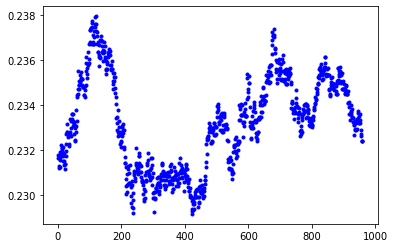

In [ ]:
print("train_x[0]\n", train_x[0])
print()
print("train_y[0]\n", train_y[0])

plt.plot(train_x[0].T[0], '.', color='blue')
# plt.plot([len(train_x[0])], train_y[0,0], 'x', color='blue')

plt.show()

## 학습

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               69632     
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
 dense_3 (Dense)             (None, 2)                 22        
                                                                 
Total params: 70,944
Trainable params: 70,944
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
254/254 [==============================] - 14s 50ms/step - loss: 0.6936 - acc: 0.5165 - val_loss: 0.6928 - val_acc: 0.5133
Epoch 2/10
254/254 [============================

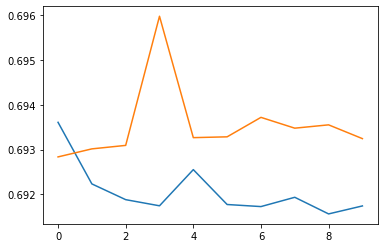

32/32 [==============================] - 1s 20ms/step - loss: 0.6923 - acc: 0.5140
loss= 0.6922773122787476
acc= 0.5139999985694885


In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
output_shape = train_y.shape[-1]

model = keras.Sequential()
model.add(LSTM(128, input_shape=input_shape))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
# model.add(Dense(output_shape))
model.add(Dense(2, activation="softmax"))
# model.compile(loss="mse", optimizer="adam", metrics=["mape"])
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=1, validation_split=0.1, batch_size=BATCH_SIZE)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



# loss, mape = model.evaluate(test_x, test_y)
# print("loss=", loss)
# print("mape=", mape)
loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


# y_ = model.predict(test_x).squeeze()
# for i in range(output_shape):
#     plt.scatter(test_y[:,i], y_[:,i])
#     plt.show()
y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)
plt.plot(test_y[:30], 'o')
plt.plot(predicted[:30], '.')
plt.show()

## 결과 보기

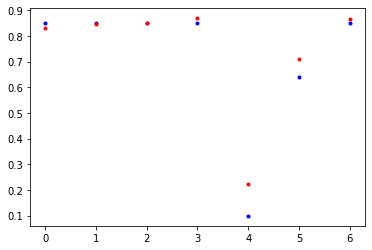

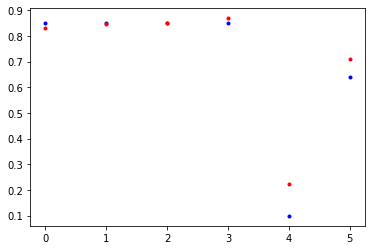

In [ ]:
plt.plot(test_y[0], 'b.')
plt.plot(y_[0], 'r.')
plt.show()

plt.plot(test_y[0,:-1], 'b.')
plt.plot(y_[0,:-1], 'r.')
plt.show()

In [ ]:
denomalized_test_y = test_y * (maxs - mins) + mins
denomalized_y_ = y_ * (maxs - mins) + mins
delogged_test_y = np.exp(denomalized_test_y) - 1
delogged_y = np.exp(denomalized_y_) - 1


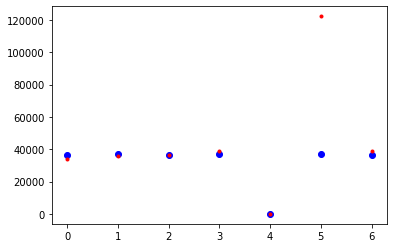

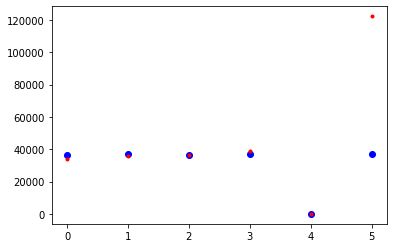

In [ ]:
plt.plot(delogged_test_y[0], 'bo')
plt.plot(delogged_y[0], 'r.')
plt.show()

plt.plot(delogged_test_y[0,:-1], 'bo')
plt.plot(delogged_y[0,:-1], 'r.')
plt.show()